# 기존에 했던 시뮬레이션은 앙상블해서 확인해 보자.
1. 기존 히스테리 시스를 했던것을 대폭 수정. 앙상블을 할때 데이터를 최대한 적게 가져 나오게 하자.
   > 필요한 데이터. 1. t는 하나만, order parmeter r에 대한 데이터  
   > theta의 생성은 uniform distribution에서 셔플해준 것, omega역시 셔플해준 것   
   > 마지막 50초 동안 평균낸 데이터를 받을까?  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.for_ensemble import *
import parmap 
from tqdm.notebook import tqdm
from TO_sim.Utility import Create_Folder
DF = 'Review/22.11.06/' # default_folder 
Create_Folder(DF)

In [43]:
seeds = np.arange(0,10)
m = 6
def Mean_ensemble_F(K):
    Forward_r = parmap.map(sim_forward,seeds,K=K,m=m,pm_processes=16,pm_pbar=False)
    Mean_time = int(50/dt)
    A = np.array(Forward_r)
    Mean_r = np.mean(A[:,-Mean_time:],axis=1)
    Error_r = np.std(A[:,-Mean_time:],axis=1)
    return Mean_r,Error_r

def Mean_ensemble_B(K):
    backward_r = parmap.map(sim_backward,seeds,K=K,m=m,pm_processes=16,pm_pbar=False)
    Mean_time = int(50/dt)
    A = np.array(backward_r)
    Mean_r = np.mean(A[:,-Mean_time:],axis=1)
    Error_r = np.std(A[:,-Mean_time:],axis=1)
    return Mean_r,Error_r


In [82]:
Ks = np.arange(0.9,12.5,0.2)

Means_F = []
errors_F = []

for K in tqdm(Ks):
    Mean,error = Mean_ensemble_F(K)
    Means_F.append(Mean)
    errors_F.append(error)

Means_B = []
errors_B = []

for K in tqdm(Ks):
    Mean,error = Mean_ensemble_B(K)
    Means_B.append(Mean)
    errors_B.append(error)

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

In [83]:
Mean_time = int(50/dt)

Mean_rs_mean_F = np.mean(Means_F,axis=1)
Mean_rs_std_F = np.std(Means_F,axis=1)

Mean_rs_mean_B = np.mean(Means_B,axis=1)
Mean_rs_std_B = np.std(Means_B,axis=1)

# plt.plot(Ks,Means,'d',alpha = 0.5)

In [44]:

from TO_sim.Check_theorical import *
Mean_time = int(50/dt)
def Draw_case11_KR(m):
    Ks = np.linspace(1,12.5,1000)
    KF,RF,KB,RB = Make_theorical_KR(Ks,m)
    return KF,RF,KB,RB
KF,RF,KB,RB =Draw_case11_KR(m)


c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Check_theorical.py:23: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


<ErrorbarContainer object of 3 artists>

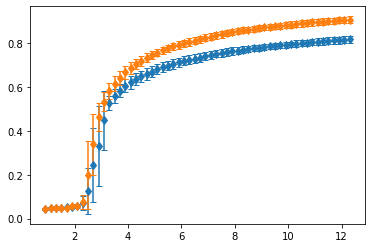

In [86]:
plt.errorbar(Ks,Mean_rs_mean_F,yerr=Mean_rs_std_F,label=r"$r_{init} = 0$",fmt='d',markersize=6,capsize=3,color = 'Tab:Blue')
plt.errorbar(Ks,Mean_rs_mean_B,yerr=Mean_rs_std_B,label=r"$r_{init} = 1$",fmt='d',markersize=6,capsize=3,color = 'Tab:Orange')

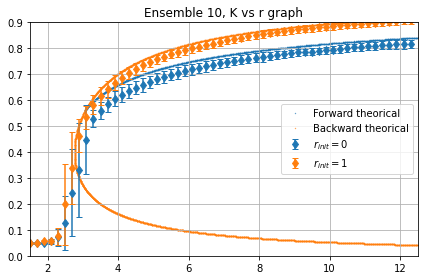

In [87]:
plt.scatter(KF,RF,s=0.1,color = 'Tab:blue',label='Forward theorical')
plt.scatter(KB,RB,s=0.1,color = 'Tab:Orange',label='Backward theorical')
plt.errorbar(Ks,Mean_rs_mean_F,yerr=Mean_rs_std_F,label=r"$r_{init} = 0$",fmt='d',markersize=6,capsize=3,color = 'Tab:Blue')
plt.errorbar(Ks,Mean_rs_mean_B,yerr=Mean_rs_std_B,label=r"$r_{init} = 1$",fmt='d',markersize=6,capsize=3,color = 'Tab:Orange')
plt.title('Ensemble 10, K vs r graph')
plt.grid()
plt.legend()    
plt.xlim(1.5,12.5)
plt.ylim(0,0.9)
plt.tight_layout()
plt.savefig(DF+f'm={m}, ensemble = 10.png',dpi=400,transparent=True)

# Hysterisis

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.for_ensemble import *
import parmap 
from tqdm.notebook import tqdm
from TO_sim.Utility import Create_Folder
DF = 'Review/22.11.06/' # default_folder 
Create_Folder(DF)
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_sim as Hys_sim
from TO_sim.for_ensemble import *


import numpy as np
seeds = np.arange(100,200)
Mean_time = int(50/dt)
m = 2
from TO_sim.Check_theorical import *
def Draw_case11_KR(m):
    Ks = np.linspace(1,12.5,1000)
    KF,RF,KB,RB = Make_theorical_KR(Ks,m)
    return KF,RF,KB,RB
KF,RF,KB,RB =Draw_case11_KR(m)


In [12]:
SETS = parmap.map(sim_Hystersis,seeds,m=m,pm_processes=15,pm_pbar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [50]:
m

6

In [3]:
Forward = []
Backward = []
for KSDF,KSRDF in SETS:
    KF_ = KSDF['rs'].to_numpy()
    KRF_ = KSRDF['rs'].to_numpy()
    Forward.append(KF_)
    Backward.append(KRF_)
Forward = np.asarray(Forward)
Backward = np.asarray(Backward)

In [4]:
def for_mean(Forward):
    A_F_mean = []
    A_F_std = []
    for ensemble in Forward:
        Mean_Kr = []
        Std_Kr = []
        for rs in ensemble:
            temp = rs[-Mean_time:]
            mean_ = np.mean(temp)
            std_ = np.std(temp)
            Mean_Kr.append(mean_)
            Std_Kr.append(std_)
        A_F_mean.append(Mean_Kr)
        A_F_std.append(Std_Kr)
    A_F_mean = np.array(A_F_mean)
    A_F_std = np.array(A_F_std)
    return A_F_mean, A_F_std

In [5]:
Ks = KSDF.index

In [7]:
A_F_mean, A_F_std = for_mean(Forward)
FMean = np.mean(A_F_mean,axis=0)
FMeanStd = np.std(A_F_mean,axis=0)
FStd = np.mean(A_F_std,axis=0)

A_B_mean, A_B_std = for_mean(Backward)
BMean = np.mean(A_B_mean,axis=0)
BMeanStd = np.std(A_B_mean,axis=0)
BStd = np.mean(A_B_std,axis=0)

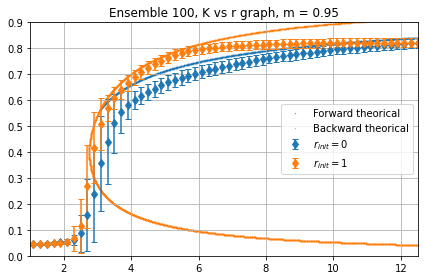

In [8]:
plt.scatter(KF,RF,s=0.1,color = 'Tab:blue',label='Forward theorical')
plt.scatter(KB,RB,s=0.1,color = 'Tab:Orange',label='Backward theorical')
plt.errorbar(Ks,FMean,yerr=FMeanStd,label=r"$r_{init} = 0$",fmt='d',markersize=6,capsize=3,color = 'Tab:Blue')
plt.errorbar(Ks,BMean[::-1],yerr=BMeanStd[::-1],label=r"$r_{init} = 1$",fmt='d',markersize=6,capsize=3,color = 'Tab:Orange')
plt.title(f'Ensemble {len(seeds)}, K vs r graph, m = {m}')
plt.grid()
plt.legend()    
plt.xlim(1,12.5)
plt.ylim(0,0.9)
plt.tight_layout()
plt.savefig(DF+f'Hystersis m={m}, ensemble = {len(seeds)},t_end = {t_end_HY}.png',dpi=400,transparent=True)

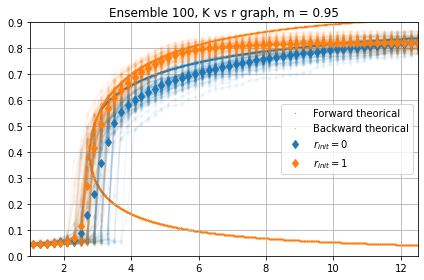

In [10]:
plt.scatter(KF,RF,s=0.1,color = 'Tab:blue',label='Forward theorical')
plt.scatter(KB,RB,s=0.1,color = 'Tab:Orange',label='Backward theorical')
plt.plot(Ks,A_F_mean.T,marker='d',markersize=3,alpha=0.05,color = 'Tab:Blue')
plt.plot(Ks,A_B_mean[:,::-1].T,marker='d',markersize=3,alpha=0.05,color = 'Tab:Orange')
plt.plot(Ks,FMean,'d',label=r"$r_{init} = 0$",markersize=6,color = 'Tab:Blue')
plt.plot(Ks,BMean[::-1],'d',label=r"$r_{init} = 1$",markersize=6,color = 'Tab:Orange')

plt.title(f'Ensemble {len(seeds)}, K vs r graph, m = {m}')
plt.grid()
plt.legend()    
plt.xlim(1,12.5)
plt.ylim(0,0.9)
plt.tight_layout()
plt.savefig(DF+f'Hystersis m={m},2 ensemble = {len(seeds)},t_end = {t_end_HY}.png',dpi=400,transparent=True)

In [31]:
np.asarray(Forward[0,:]).shape

(63,)